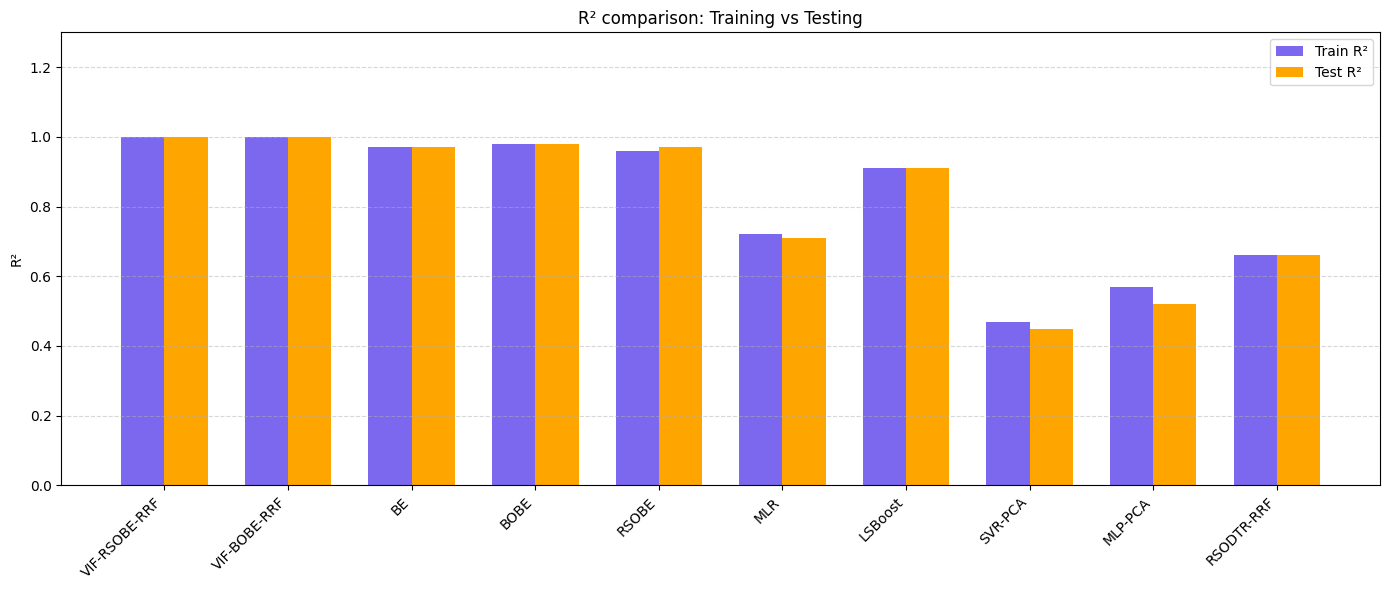

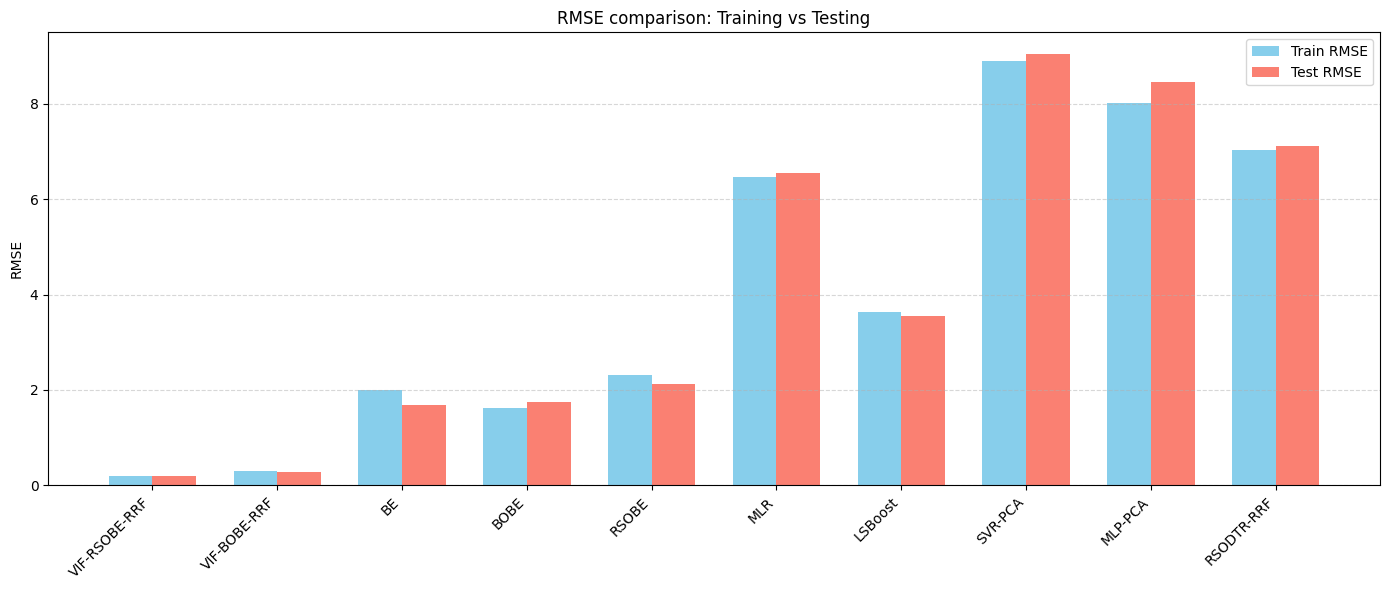

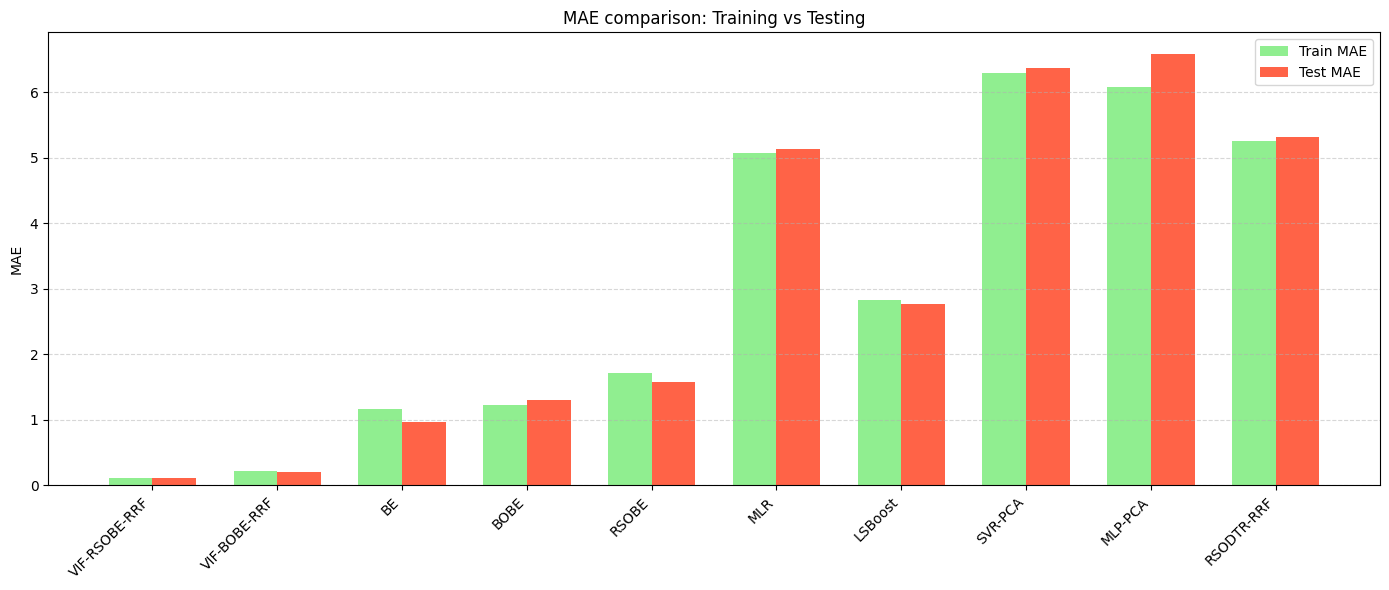

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define models
models = [
    'VIF-RSOBE-RRF', 'VIF-BOBE-RRF', 'BE', 'BOBE', 'RSOBE', 'MLR',
    'LSBoost', 'SVR-PCA', 'MLP-PCA', 'RSODTR-RRF'
]

# RMSE and MAE for training and testing
# R-squared values
r2_train = [1, 1, 0.97, 0.98, 0.96, 0.72, 0.91, 0.47, 0.57, 0.66]
r2_test  = [1, 1, 0.97, 0.98, 0.97, 0.71, 0.91, 0.45, 0.52, 0.66]

rmse_train = [0.18797, 0.30585, 2.0018, 1.6299, 2.3233, 6.4679, 3.6235, 8.8995, 8.007, 7.0286]
rmse_test  = [0.18861, 0.27778, 1.678, 1.7395, 2.1269, 6.5578, 3.5519, 9.0443, 8.465, 7.1060]

mae_train = [0.11745, 0.22343, 1.1699, 1.2319, 1.7156, 5.0707, 2.8272, 6.2976, 6.0824, 5.2508]
mae_test  = [0.11478, 0.20626, 0.96414, 1.3066, 1.575, 5.1357, 2.7733, 6.364, 6.5821, 5.3198]

# Set bar width and position
x = np.arange(len(models))
width = 0.35

# --- Plot R-squared ---
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, r2_train, width, label='Train R²', color='mediumslateblue')
plt.bar(x + width/2, r2_test, width, label='Test R²', color='orange')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('R²')
plt.title('R² comparison: Training vs Testing')
plt.ylim(0, 1.3)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- Plot RMSE ---
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, rmse_train, width, label='Train RMSE', color='skyblue')
plt.bar(x + width/2, rmse_test, width, label='Test RMSE', color='salmon')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('RMSE')
plt.title('RMSE comparison: Training vs Testing')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- Plot MAE ---
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, mae_train, width, label='Train MAE', color='lightgreen')
plt.bar(x + width/2, mae_test, width, label='Test MAE', color='tomato')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('MAE')
plt.title('MAE comparison: Training vs Testing')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



🔍 SHAP for Model 2 (VIF-RSOBE-RRF)

📊 Global Feature Importance for Kaggle total UPDRS prediction — VIF-RSOBE-RRF model (Bar Plot)


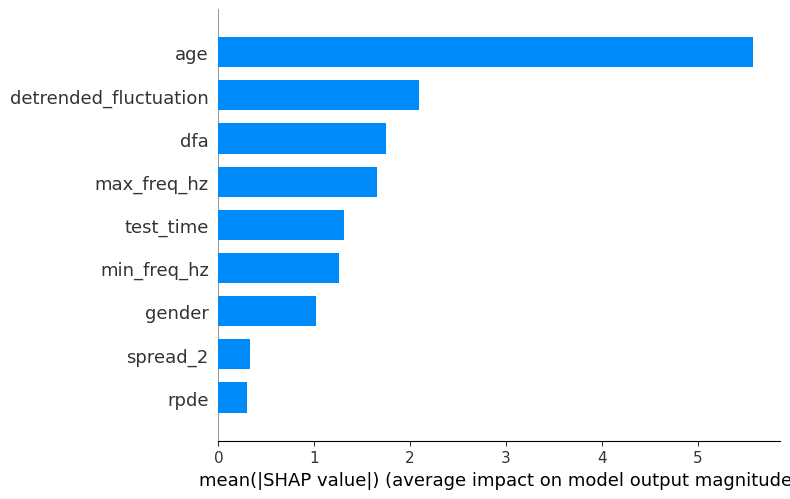


📊 Feature Effect Per Instance for Kaggle total UPDRS prediction — VIF-RSOBE-RRF model(Beeswarm)


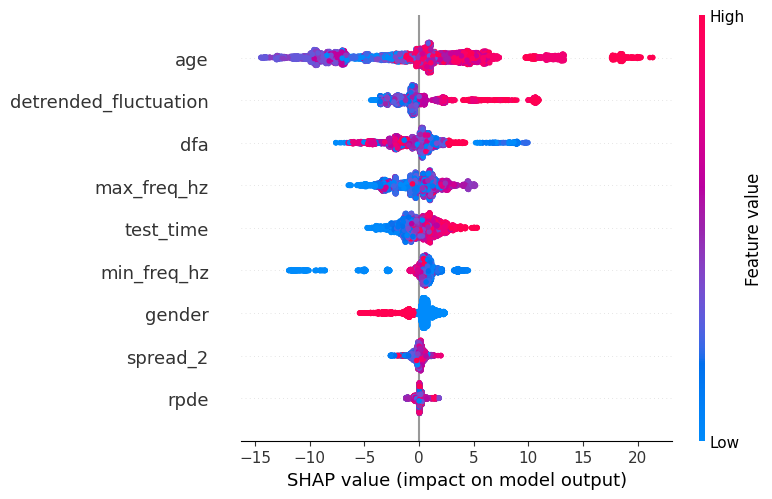

In [4]:
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# --- Load New Dataset ---
data = pd.read_excel("new data total.xlsx")

# --- Define Features and Target ---
selected_features = ['max_freq_hz', 'min_freq_hz', 'rpde', 'dfa',
                     'spread_2', 'detrended_fluctuation', 'age', 'gender', 'test_time']
X = data[selected_features]
y = data.iloc[:, -1]  # assuming last column is the target (e.g., total_UPDRS)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Define Model 2: VIF-RSOBE-RRF ---
model2 = Pipeline([
    ('scaler', StandardScaler()),
    ('bagging', BaggingRegressor(
        estimator=DecisionTreeRegressor(min_samples_leaf=2),
        n_estimators=121,
        max_features=len(selected_features),
        random_state=42,
        n_jobs=-1
    ))
])

# --- Fit Model 2 ---
model2.fit(X_train, y_train)

# --- Scale Test Data ---
scaler2 = model2.named_steps['scaler']
X_test_scaled2 = scaler2.transform(X_test)

# --- SHAP for Model 2 ---
print("\n🔍 SHAP for Model 2 (VIF-RSOBE-RRF)")
shap_values_list2 = [
    shap.TreeExplainer(tree).shap_values(X_test_scaled2)
    for tree in model2.named_steps['bagging'].estimators_
]
shap_values2_avg = np.mean(shap_values_list2, axis=0)

# --- Convert Scaled Test Data to DataFrame for SHAP Plot ---
X_test_df = pd.DataFrame(X_test_scaled2, columns=selected_features)

# --- SHAP Summary Plots (Bar) ---
print("\n📊 Global Feature Importance for Kaggle total UPDRS prediction — VIF-RSOBE-RRF model (Bar Plot)")
shap.summary_plot(shap_values2_avg, X_test_df, feature_names=selected_features, plot_type="bar")

# --- SHAP Summary Plots (Beeswarm) ---
print("\n📊 Feature Effect Per Instance for Kaggle total UPDRS prediction — VIF-RSOBE-RRF model(Beeswarm)")
shap.summary_plot(shap_values2_avg, X_test_df, feature_names=selected_features)
